### Group 1 - Project Phase 1

George Bittar - 1819062

Francisco Romel Flores - 0178269

Bhuvan Sireesh Korukonda - 2297832

Tanmai Veerapaneni - 2315355

Vara Lakshmi Mamillapalli - 2315749

Victor Paul Buddha - 2298520

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the csv file using pd.read_csv() function
df = pd.read_csv('data/e-shop clothing 2008.csv',delimiter=';')

In [3]:
# Printing the first five values of the dataset using .head() function
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [5]:
df.describe()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


As seen by df.info and df.isnull, there are no empty rows in our dataset.

In [6]:
# Combine YEAR, MONTH, and DAY into a new 'DATE' column
df['DATE'] = pd.to_datetime(df[['year', 'month', 'day']])

# drop the original YEAR, MONTH, and DAY columns
#df = df.drop(columns=['year', 'month', 'day'])


df['DATE']

0        2008-04-01
1        2008-04-01
2        2008-04-01
3        2008-04-01
4        2008-04-01
            ...    
165469   2008-08-13
165470   2008-08-13
165471   2008-08-13
165472   2008-08-13
165473   2008-08-13
Name: DATE, Length: 165474, dtype: datetime64[ns]

In [7]:
#From e-shop clothing 2008 data description.txt we get the following country mapping
country_map = {
    "1": "Australia",
    "2": "Austria",
    "3": "Belgium",
    "4": "British Virgin Islands",
    "5": "Cayman Islands",
    "6": "Christmas Island",
    '7': "Croatia",
    '8': "Cyprus",
    '9': "Czech Republic",
    '10': "Denmark",
    "11": "Estonia",
    "12": "unidentified",
    "13": "Faroe Islands",
    "14": "Finland",
    "15": "France",
    "16": "Germany",
    '17': "Greece",
    "18": "Hungary",
    "19": "Iceland",
    "20": "India",
    "21": "Ireland",
    "22": "Italy",
    "23": "Latvia",
    "24": "Lithuania",
    "25": "Luxembourg",
    "26": "Mexico",
    "27": "Netherlands",
    "28": "Norway",
    "29": "Poland",
    "30": "Portugal",
    "31": "Romania",
    '32': "Russia",
    '33': "San Marion",
    "34": "Slovakia",
    "35": "Slovenia",
    "36": "Spain",
    '37': "Sweden",
    "38": "Switzerland",
    "39": "Ukraine",
    "40": "United Arab Emirates",
    "41": "United Kingdom",
    "42": "USA",
    "43": "biz (.biz)",
    "44": "com (.com)",
    "45": "int (.int)",
    "46": "net (.net)",
    "47": "org (*.org)"
}

df['country'] = df['country'].astype("string")
df["country"] = df["country"].map(country_map)
df["country"]

0                 Poland
1                 Poland
2                 Poland
3                 Poland
4                 Poland
               ...      
165469            Poland
165470    Czech Republic
165471          Slovakia
165472          Slovakia
165473          Slovakia
Name: country, Length: 165474, dtype: object

In [8]:
# Doing the same for colours
color_map = {
    1: "beige",
    2: "black",
    3: "blue",
    4: "brown",
    5: "burgundy",
    6: "gray",
    7: "green",
    8: "navy blue",
    9: "of many colors",
    10: "olive",
    11: "pink",
    12: "red",
    13: "violet",
    14: "white"
}

df["colour"] = df["colour"].map(color_map)

In [9]:
# Doing the same for model photography column
model_map = {
    1: "En face",
    2: "Profile"}

df["model photography"] = df["model photography"].map(model_map)

In [10]:
# Doing the same for months column
month_map = {
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
}

df["month"] = df["month"].map(month_map)

In [11]:
#From e-shop clothing 2008 data description.txt we get the following mapping

page1_map = {
    1: "trousers",
    2: "skirts",
    3: "blouses",
    4: "sale"
}
df["page 1 (main category)"] = df["page 1 (main category)"].map(page1_map)

In [12]:
#From e-shop clothing 2008 data description.txt we get the following mapping

location_map = {
    1: "top left",
    2: "top in the middle",
    3: "top right",
    4: 'bottom left',
    5: "bottom in the middle",
    6: "bottom right"
}

df["location"] = df["location"].map(location_map)

### Our variables have been mapped back to their original values. They are now interpretable and we can proceed with the EDA to gain insights on the dataset.

In [13]:
df

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page,DATE
0,2008,April,1,1,Poland,1,trousers,A13,beige,bottom in the middle,En face,28,2,1,2008-04-01
1,2008,April,1,2,Poland,1,trousers,A16,beige,bottom right,En face,33,2,1,2008-04-01
2,2008,April,1,3,Poland,1,skirts,B4,olive,top in the middle,En face,52,1,1,2008-04-01
3,2008,April,1,4,Poland,1,skirts,B17,gray,bottom right,Profile,38,2,1,2008-04-01
4,2008,April,1,5,Poland,1,skirts,B8,brown,top right,Profile,52,1,1,2008-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,August,13,1,Poland,24024,skirts,B10,black,bottom left,En face,67,1,1,2008-08-13
165470,2008,August,13,1,Czech Republic,24025,trousers,A11,blue,bottom left,En face,62,1,1,2008-08-13
165471,2008,August,13,1,Slovakia,24026,trousers,A2,blue,top left,En face,43,2,1,2008-08-13
165472,2008,August,13,2,Slovakia,24026,blouses,C2,red,top left,En face,43,1,1,2008-08-13


In [14]:
df.shape

(165474, 15)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape  

(165474, 15)

There are no Duplicate rows.

In [17]:
#Investigating the column page 2 (clothing model)

df["page 2 (clothing model)"].value_counts()
df[df["page 2 (clothing model)"] == "B4"]

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page,DATE
2,2008,April,1,3,Poland,1,skirts,B4,olive,top in the middle,En face,52,1,1,2008-04-01
45,2008,April,1,11,Poland,7,skirts,B4,olive,top in the middle,En face,52,1,1,2008-04-01
60,2008,April,1,3,Germany,10,skirts,B4,olive,top in the middle,En face,52,1,1,2008-04-01
64,2008,April,1,1,Poland,12,skirts,B4,olive,top in the middle,En face,52,1,1,2008-04-01
144,2008,April,1,3,Poland,24,skirts,B4,olive,top in the middle,En face,52,1,1,2008-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165317,2008,August,13,4,Poland,24011,skirts,B4,olive,top in the middle,En face,52,1,1,2008-08-13
165362,2008,August,13,38,Poland,24012,skirts,B4,olive,top in the middle,En face,52,1,1,2008-08-13
165363,2008,August,13,39,Poland,24012,skirts,B4,olive,top in the middle,En face,52,1,1,2008-08-13
165416,2008,August,13,12,Poland,24018,skirts,B4,olive,top in the middle,En face,52,1,1,2008-08-13


In [18]:
#seems that page 2 is the clothing model for the category, each category can have several model's, we can drop it
#also session ID is useless
df = df.drop("page 2 (clothing model)",axis=1)
df = df.drop("session ID",axis=1)

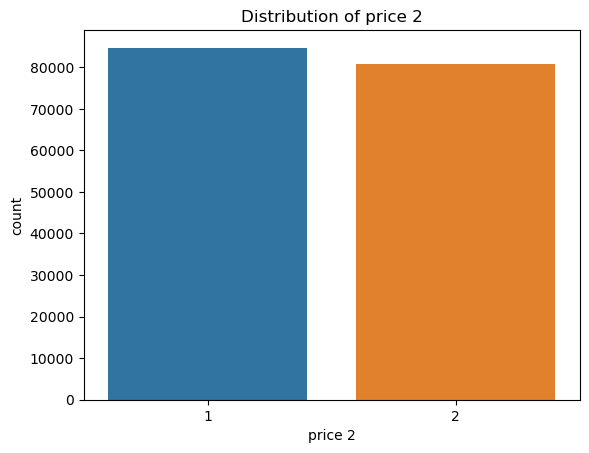

In [19]:
sns.countplot(x='price 2', data=df)
plt.title('Distribution of price 2')
plt.show()

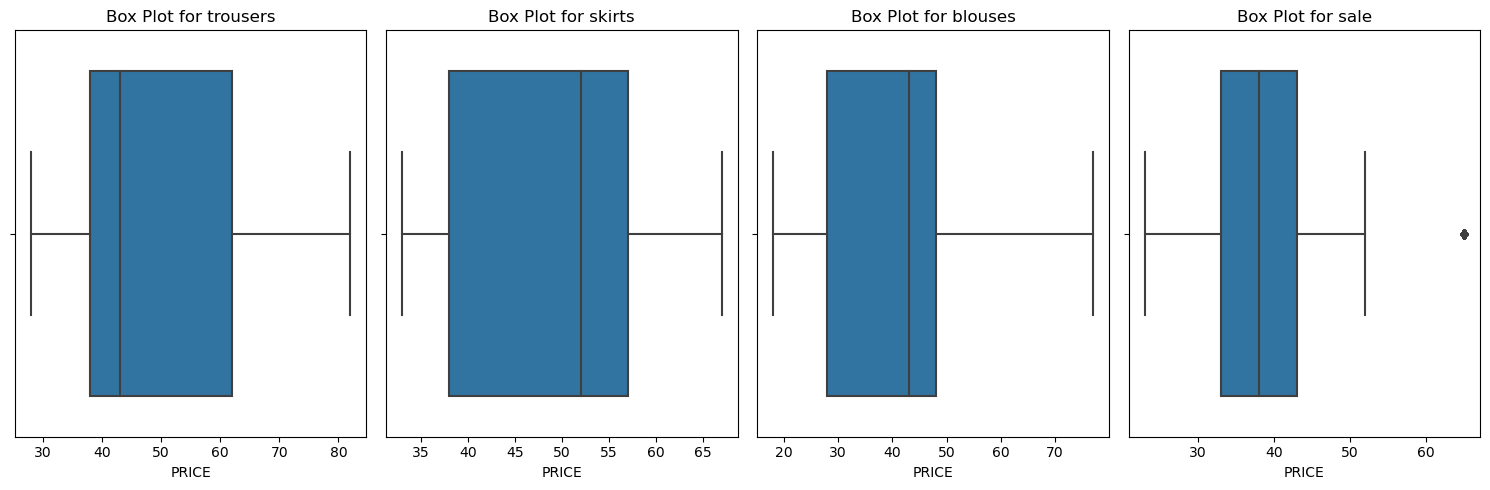

In [20]:
# Check for outliers (For each main category, make a plot box of the price to look for outliers)

# Unique values in the 'PAGE 1 (MAIN CATEGORY)' column
unique_categories = df['page 1 (main category)'].unique()


fig, axes = plt.subplots(1, len(unique_categories), figsize=(15, 5))

# Loop through unique categories and create box plots
for i, category in enumerate(unique_categories):
    data_for_category = df[df['page 1 (main category)'] == category]

    ax = sns.boxplot(x=data_for_category['price'], ax=axes[i])
    ax.set_title(f'Box Plot for {category}')
    ax.set_xlabel('PRICE')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


There's just one outlier in case of sales

Outliers in the category: sale
        year   month  day  order country page 1 (main category) colour  \
162     2008   April    1      6  Poland                   sale  brown   
355     2008   April    1      4  Poland                   sale  brown   
631     2008   April    1      1  Poland                   sale  brown   
838     2008   April    1      9  Poland                   sale  brown   
1085    2008   April    1     23  Poland                   sale  brown   
...      ...     ...  ...    ...     ...                    ...    ...   
164624  2008  August   12      1  Poland                   sale  brown   
164701  2008  August   12      1  Poland                   sale  brown   
164752  2008  August   12      8  Poland                   sale  brown   
165424  2008  August   13     20  Poland                   sale  brown   
165456  2008  August   13      3  Poland                   sale  brown   

           location model photography  price  price 2  page       DATE  
162    

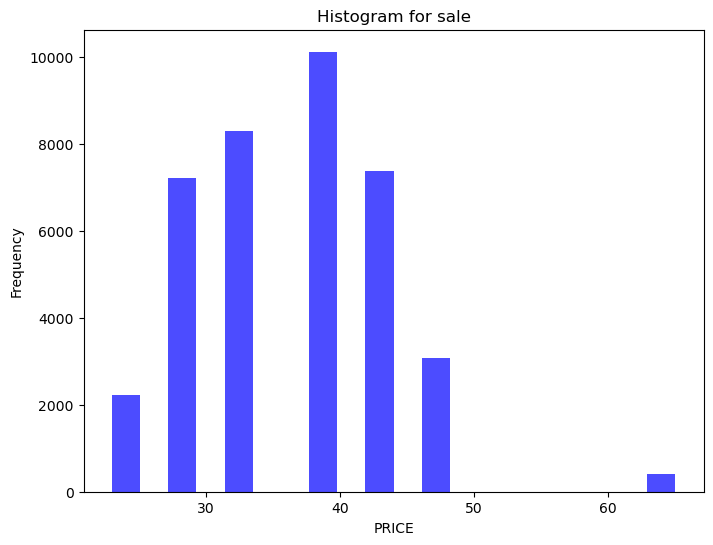

In [21]:
subset_data = df[df['page 1 (main category)'] == "sale"]

# Identify and print the outliers
outliers = subset_data[(subset_data['price'] < subset_data['price'].quantile(0.25) - 1.5 * (subset_data['price'].quantile(0.75) - subset_data['price'].quantile(0.25))) |
                      (subset_data['price'] > subset_data['price'].quantile(0.75) + 1.5 * (subset_data['price'].quantile(0.75) - subset_data['price'].quantile(0.25)))]

print("Outliers in the category:", "sale")
print(outliers)

# Summary statistics for the subset
subset_statistics = subset_data.describe()

# Display summary statistics
print("Summary Statistics for the Category:", "sale")
print(subset_statistics)

plt.figure(figsize=(8, 6))
plt.title(f'Histogram for {"sale"}')
plt.hist(subset_data['price'], bins=20, color='blue', alpha=0.7)
plt.xlabel('PRICE')
plt.ylabel('Frequency')
plt.show()


We can see it is a normal distribution with just some outliers.




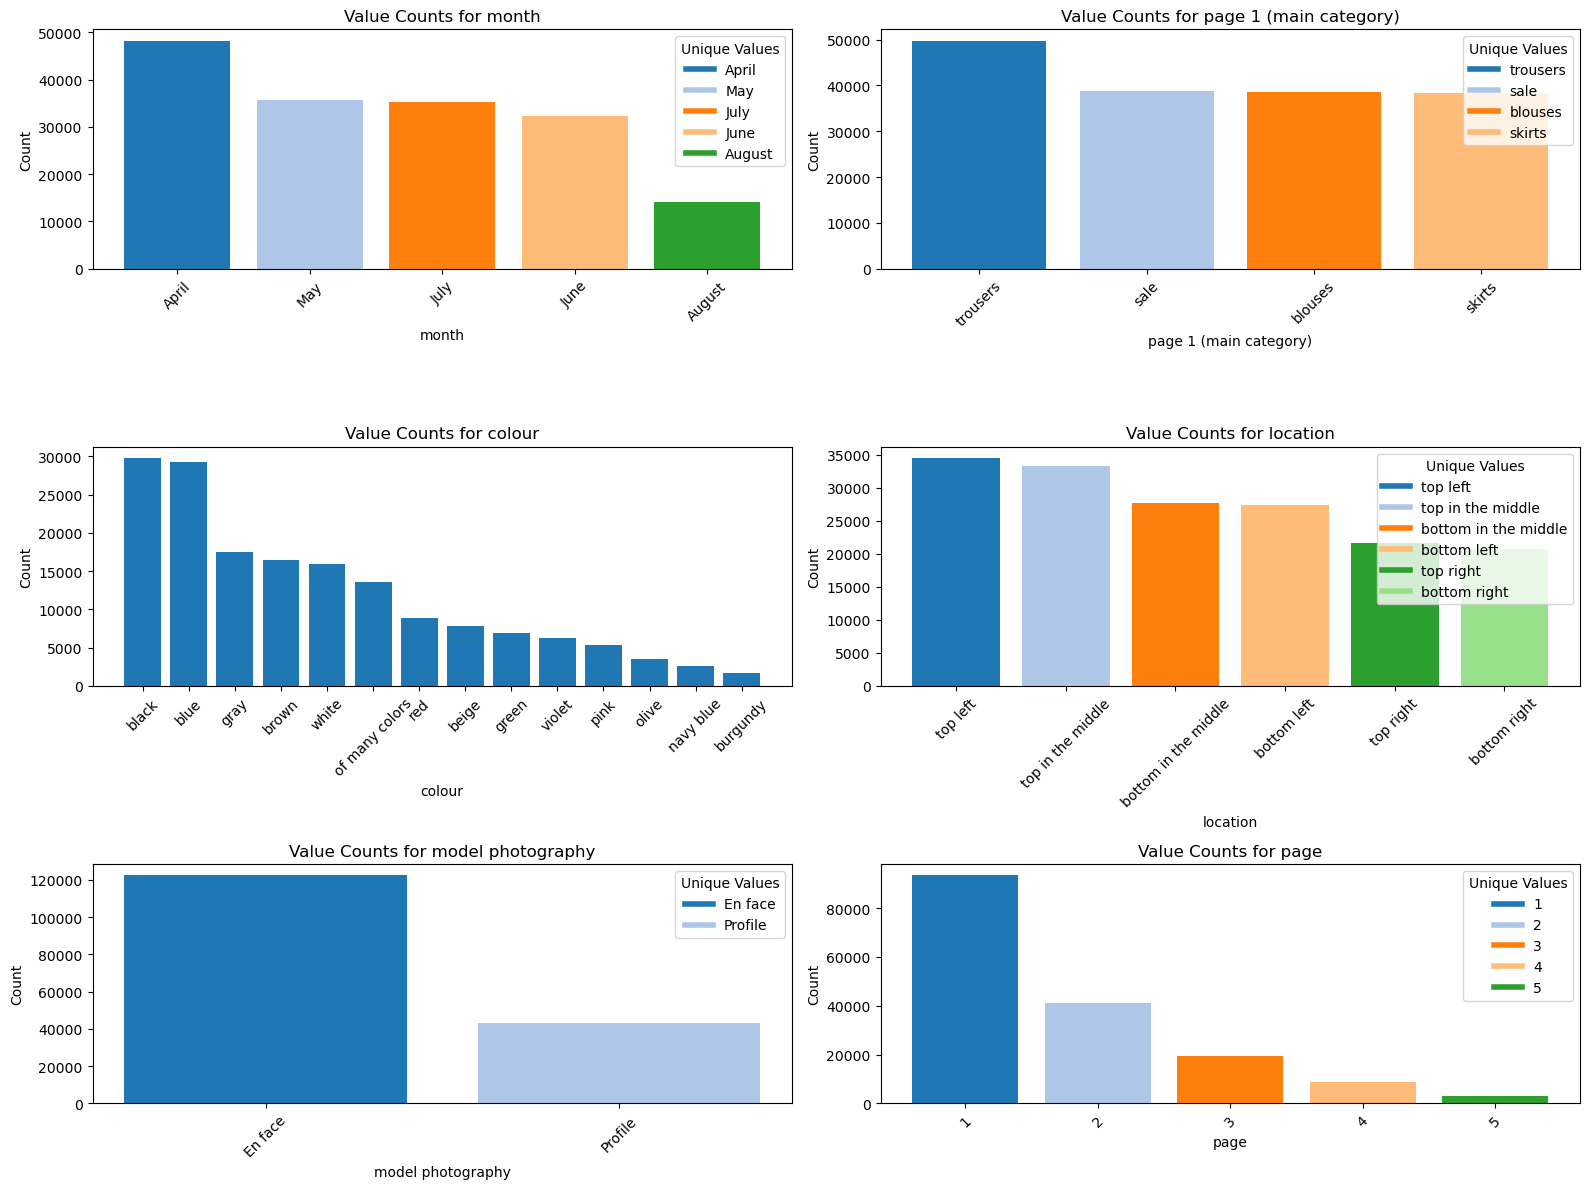

In [22]:
import matplotlib.pyplot as plt

# List of columns to create histograms for
columns_to_histogram = ['month', 'page 1 (main category)', 'colour', 'location', 'model photography', 'page']

# Number of rows and columns for the subplot grid
num_rows = 3
num_cols = 2

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Create a colormap to generate distinct colors
cmap = plt.get_cmap('tab20')

# Loop through the columns and create histograms
for i, column in enumerate(columns_to_histogram):
    ax = axes[i]
    value_counts = df[column].value_counts()
    unique_values = value_counts.index
    num_unique_values = len(unique_values)

    # Generate colors from the colormap
    colors = [cmap(i % num_unique_values) for i in range(num_unique_values)]

    if(column == "colour"):
        ax.bar(unique_values, value_counts.values)
    else:
        ax.bar(unique_values, value_counts.values, color=colors)
    ax.set_title(f'Value Counts for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

    # Create a legend
    if(column != "colour"):
        handles = [plt.Line2D([0], [0], color=colors[i], lw=4, label=str(unique_values[i])) for i in range(num_unique_values)]
        ax.legend(handles=handles, title='Unique Values', loc='upper right')

# Remove any unused subplots
for i in range(len(columns_to_histogram), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

From this plot we can see the following:

- April is the most popular month, August is the least
- Trousers are the most popular, Skirts are the least popular
- Black is the most popular colour, burgundy is the least
- The most locations is in the top left
- Most model photography are en face
- Page 1 contains the most entries

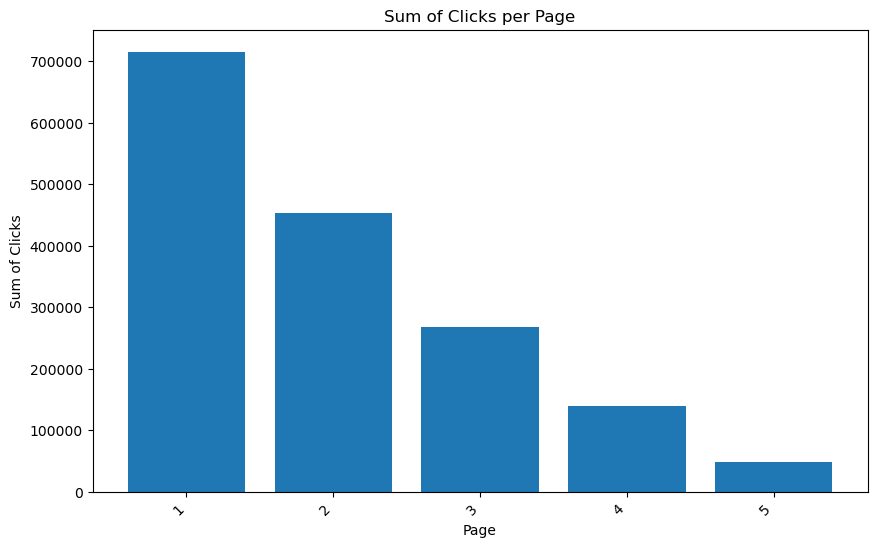

In [23]:
page_click_sums = df.groupby('page')['order'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(page_click_sums['page'], page_click_sums['order'])
plt.xlabel('Page')
plt.ylabel('Sum of Clicks')
plt.title('Sum of Clicks per Page')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

Page 1 generates the most clicks per session, page 5 generates the least.

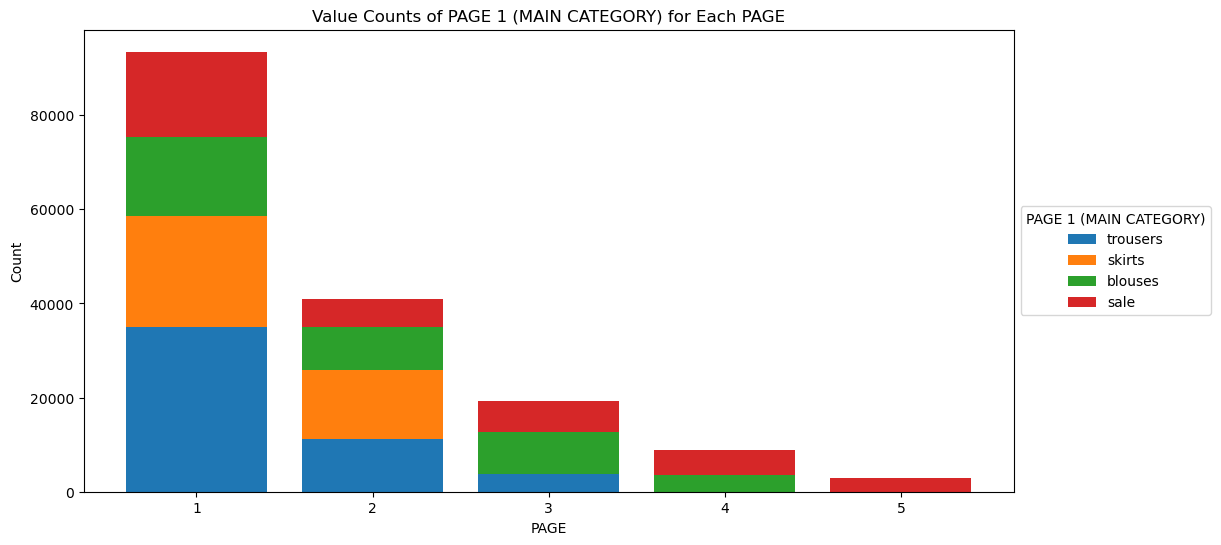

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Ensure 'page 1 (main category)' is treated as a string
df['page 1 (main category)'] = df['page 1 (main category)'].astype(str)

# Group the data by 'page' and 'page 1 (main category)' and calculate the counts
page_category_counts = df.groupby(['page', 'page 1 (main category)']).size().unstack(fill_value=0)

# Get unique values for 'page 1 (main category)'
unique_categories = df['page 1 (main category)'].unique()

# Create a stacked bar plot using Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))

bottom = None
for category in unique_categories:
    ax.bar(page_category_counts.index, page_category_counts[category], label=category, bottom=bottom)
    if bottom is None:
        bottom = page_category_counts[category].values
    else:
        bottom += page_category_counts[category].values

# Customize the plot
ax.set_title('Value Counts of PAGE 1 (MAIN CATEGORY) for Each PAGE')
ax.set_xlabel('PAGE')
ax.set_ylabel('Count')

# Create a legend with proper positioning
ax.legend(title='PAGE 1 (MAIN CATEGORY)', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


Looks like Page 1 is an overview page.

Page 5 is a sale only page.

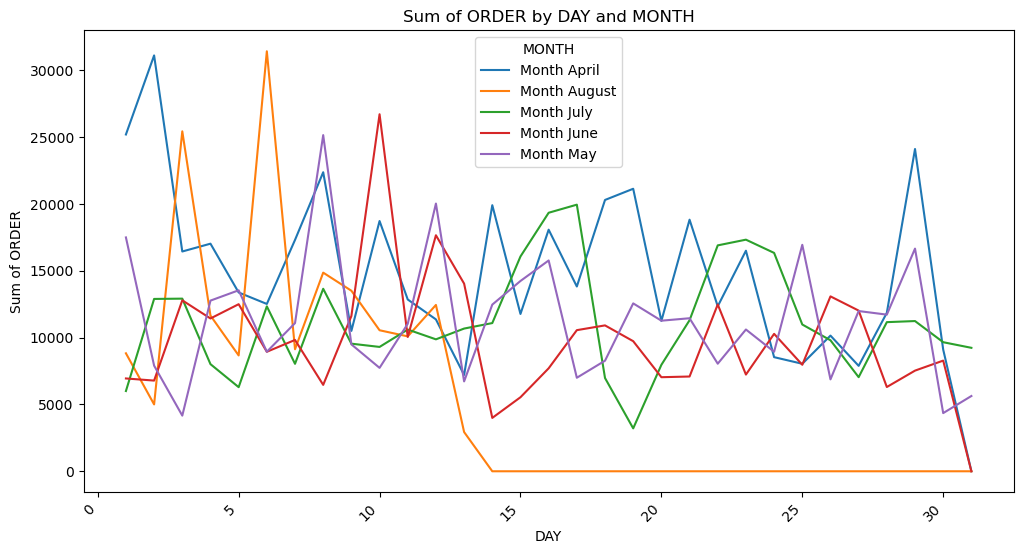

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Group the data by 'DAY' and 'MONTH' and calculate the sum of 'ORDER'
day_month_order = df.groupby(['day', 'month'])['order'].sum().unstack(fill_value=0)

# Create a line plot using Matplotlib
plt.figure(figsize=(12, 6))

for month in day_month_order.columns:
    plt.plot(day_month_order.index, day_month_order[month], label=f'Month {month}')

# Customize the plot
plt.xlabel('DAY')
plt.ylabel('Sum of ORDER')
plt.title('Sum of ORDER by DAY and MONTH')
plt.xticks(rotation=45, ha='right')
plt.legend(title='MONTH')

plt.show()


From this plot, we can see that August had a massive dropoff in clicks on the website. Either that or the website was disabled during the end of August.

### Data Cleaning & Preprocessing

In [26]:
empty_rows = df.isnull().all(axis=1)
df_empty_rows = df[empty_rows]

df_empty_rows

,year,month,day,order,country,page 1 (main category),colour,location,model photography,price,price 2,page,DATE


We can see there is no missing rows in the dataset.

Outliers:
        price  PRICE_STANDARDIZED
115        82            3.044078
237        82            3.044078
321        82            3.044078
380        82            3.044078
426        82            3.044078
...       ...                 ...
165133     82            3.044078
165134     82            3.044078
165214     82            3.044078
165290     82            3.044078
165411     82            3.044078

[1923 rows x 2 columns]


C:\Users\georg\AppData\Local\Temp\ipykernel_31240\280679172.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PRICE_STANDARDIZED'], kde=False)


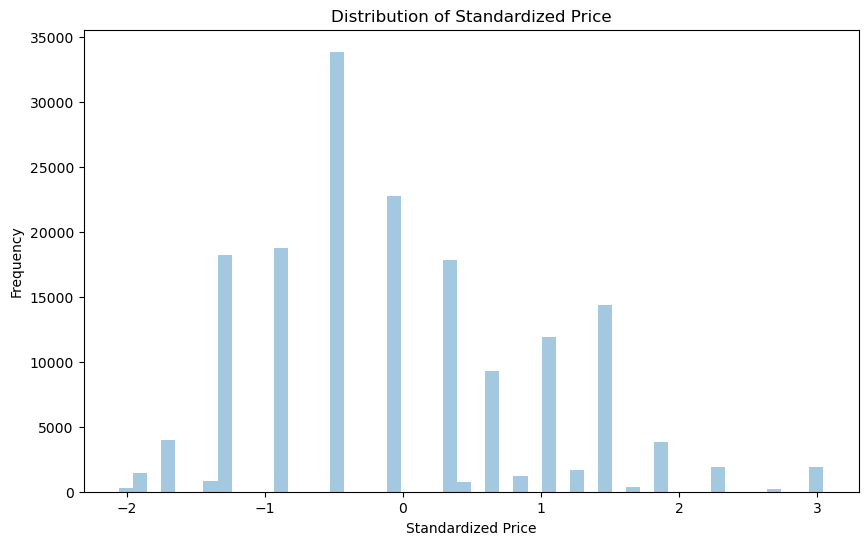

In [27]:
# Standardize the "PRICE" column
df['PRICE_STANDARDIZED'] = (df['price'] - df['price'].mean()) / df['price'].std()

# Create a distribution plot to visualize the standardized data and identify outliers
plt.figure(figsize=(10, 6))
sns.distplot(df['PRICE_STANDARDIZED'], kde=False)
plt.xlabel('Standardized Price')
plt.ylabel('Frequency')
plt.title('Distribution of Standardized Price')

# Define a threshold for identifying outliers (e.g., using z-scores)
threshold = 3  # Adjust this value based on your criteria
outliers = df[df['PRICE_STANDARDIZED'] > threshold]

# Display the outliers
print("Outliers:")
print(outliers[['price', 'PRICE_STANDARDIZED']])

plt.show()


The price data is positively skewed to the left.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   year                    165474 non-null  int64         
 1   month                   165474 non-null  object        
 2   day                     165474 non-null  int64         
 3   order                   165474 non-null  int64         
 4   country                 165474 non-null  object        
 5   page 1 (main category)  165474 non-null  object        
 6   colour                  165474 non-null  object        
 7   location                165474 non-null  object        
 8   model photography       165474 non-null  object        
 9   price                   165474 non-null  int64         
 10  price 2                 165474 non-null  int64         
 11  page                    165474 non-null  int64         
 12  DATE                    165474

In [29]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])
            encoders[col] = label_encoder

In [30]:
df = df.drop(["DATE","PRICE_STANDARDIZED"],axis=1)
df

,year,month,day,order,country,page 1 (main category),colour,location,model photography,price,price 2,page
0,2008,0,1,1,27,3,0,0,0,28,2,1
1,2008,0,1,2,27,3,0,2,0,33,2,1
2,2008,0,1,3,27,2,9,3,0,52,1,1
3,2008,0,1,4,27,2,5,2,1,38,2,1
4,2008,0,1,5,27,2,3,5,1,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,1,13,1,27,2,1,1,0,67,1,1
165470,2008,1,13,1,8,3,2,1,0,62,1,1
165471,2008,1,13,1,32,3,2,4,0,43,2,1
165472,2008,1,13,2,32,0,11,4,0,43,1,1


#### I decided to use label encoding over one hot encoding due to the numerous amounts of distinct categories. Leveraging one hot encoding would create too many additional columns. Also, the data was presented as label encoded originally.

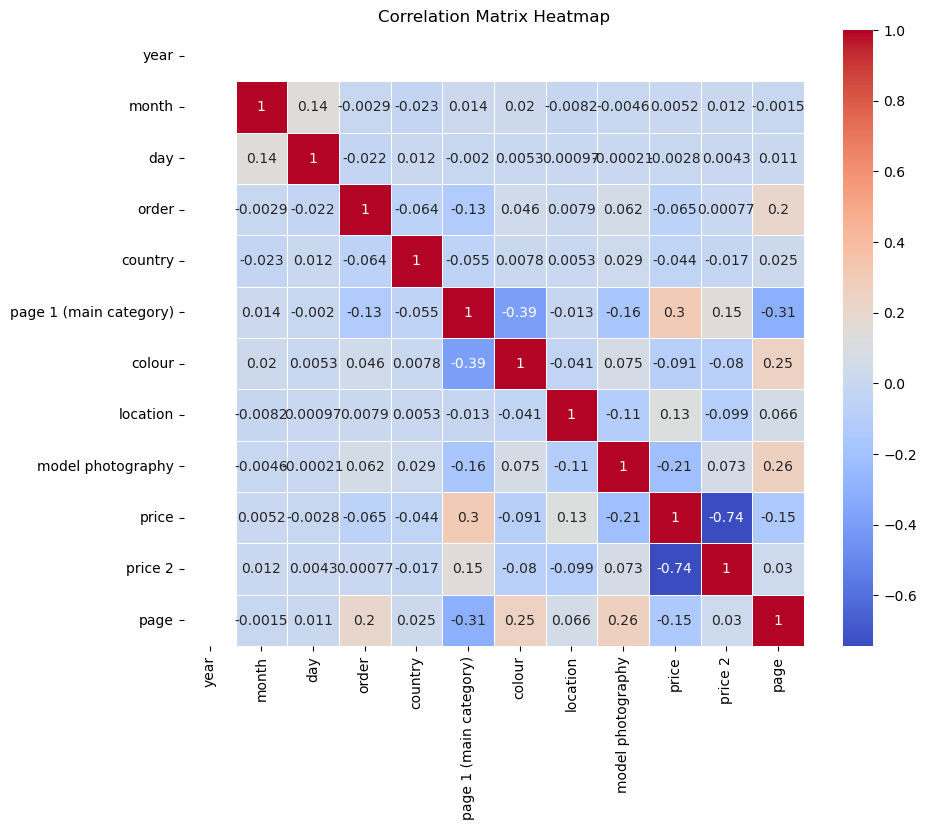

In [31]:
correlation_matrix = df.corr()

# Create a heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

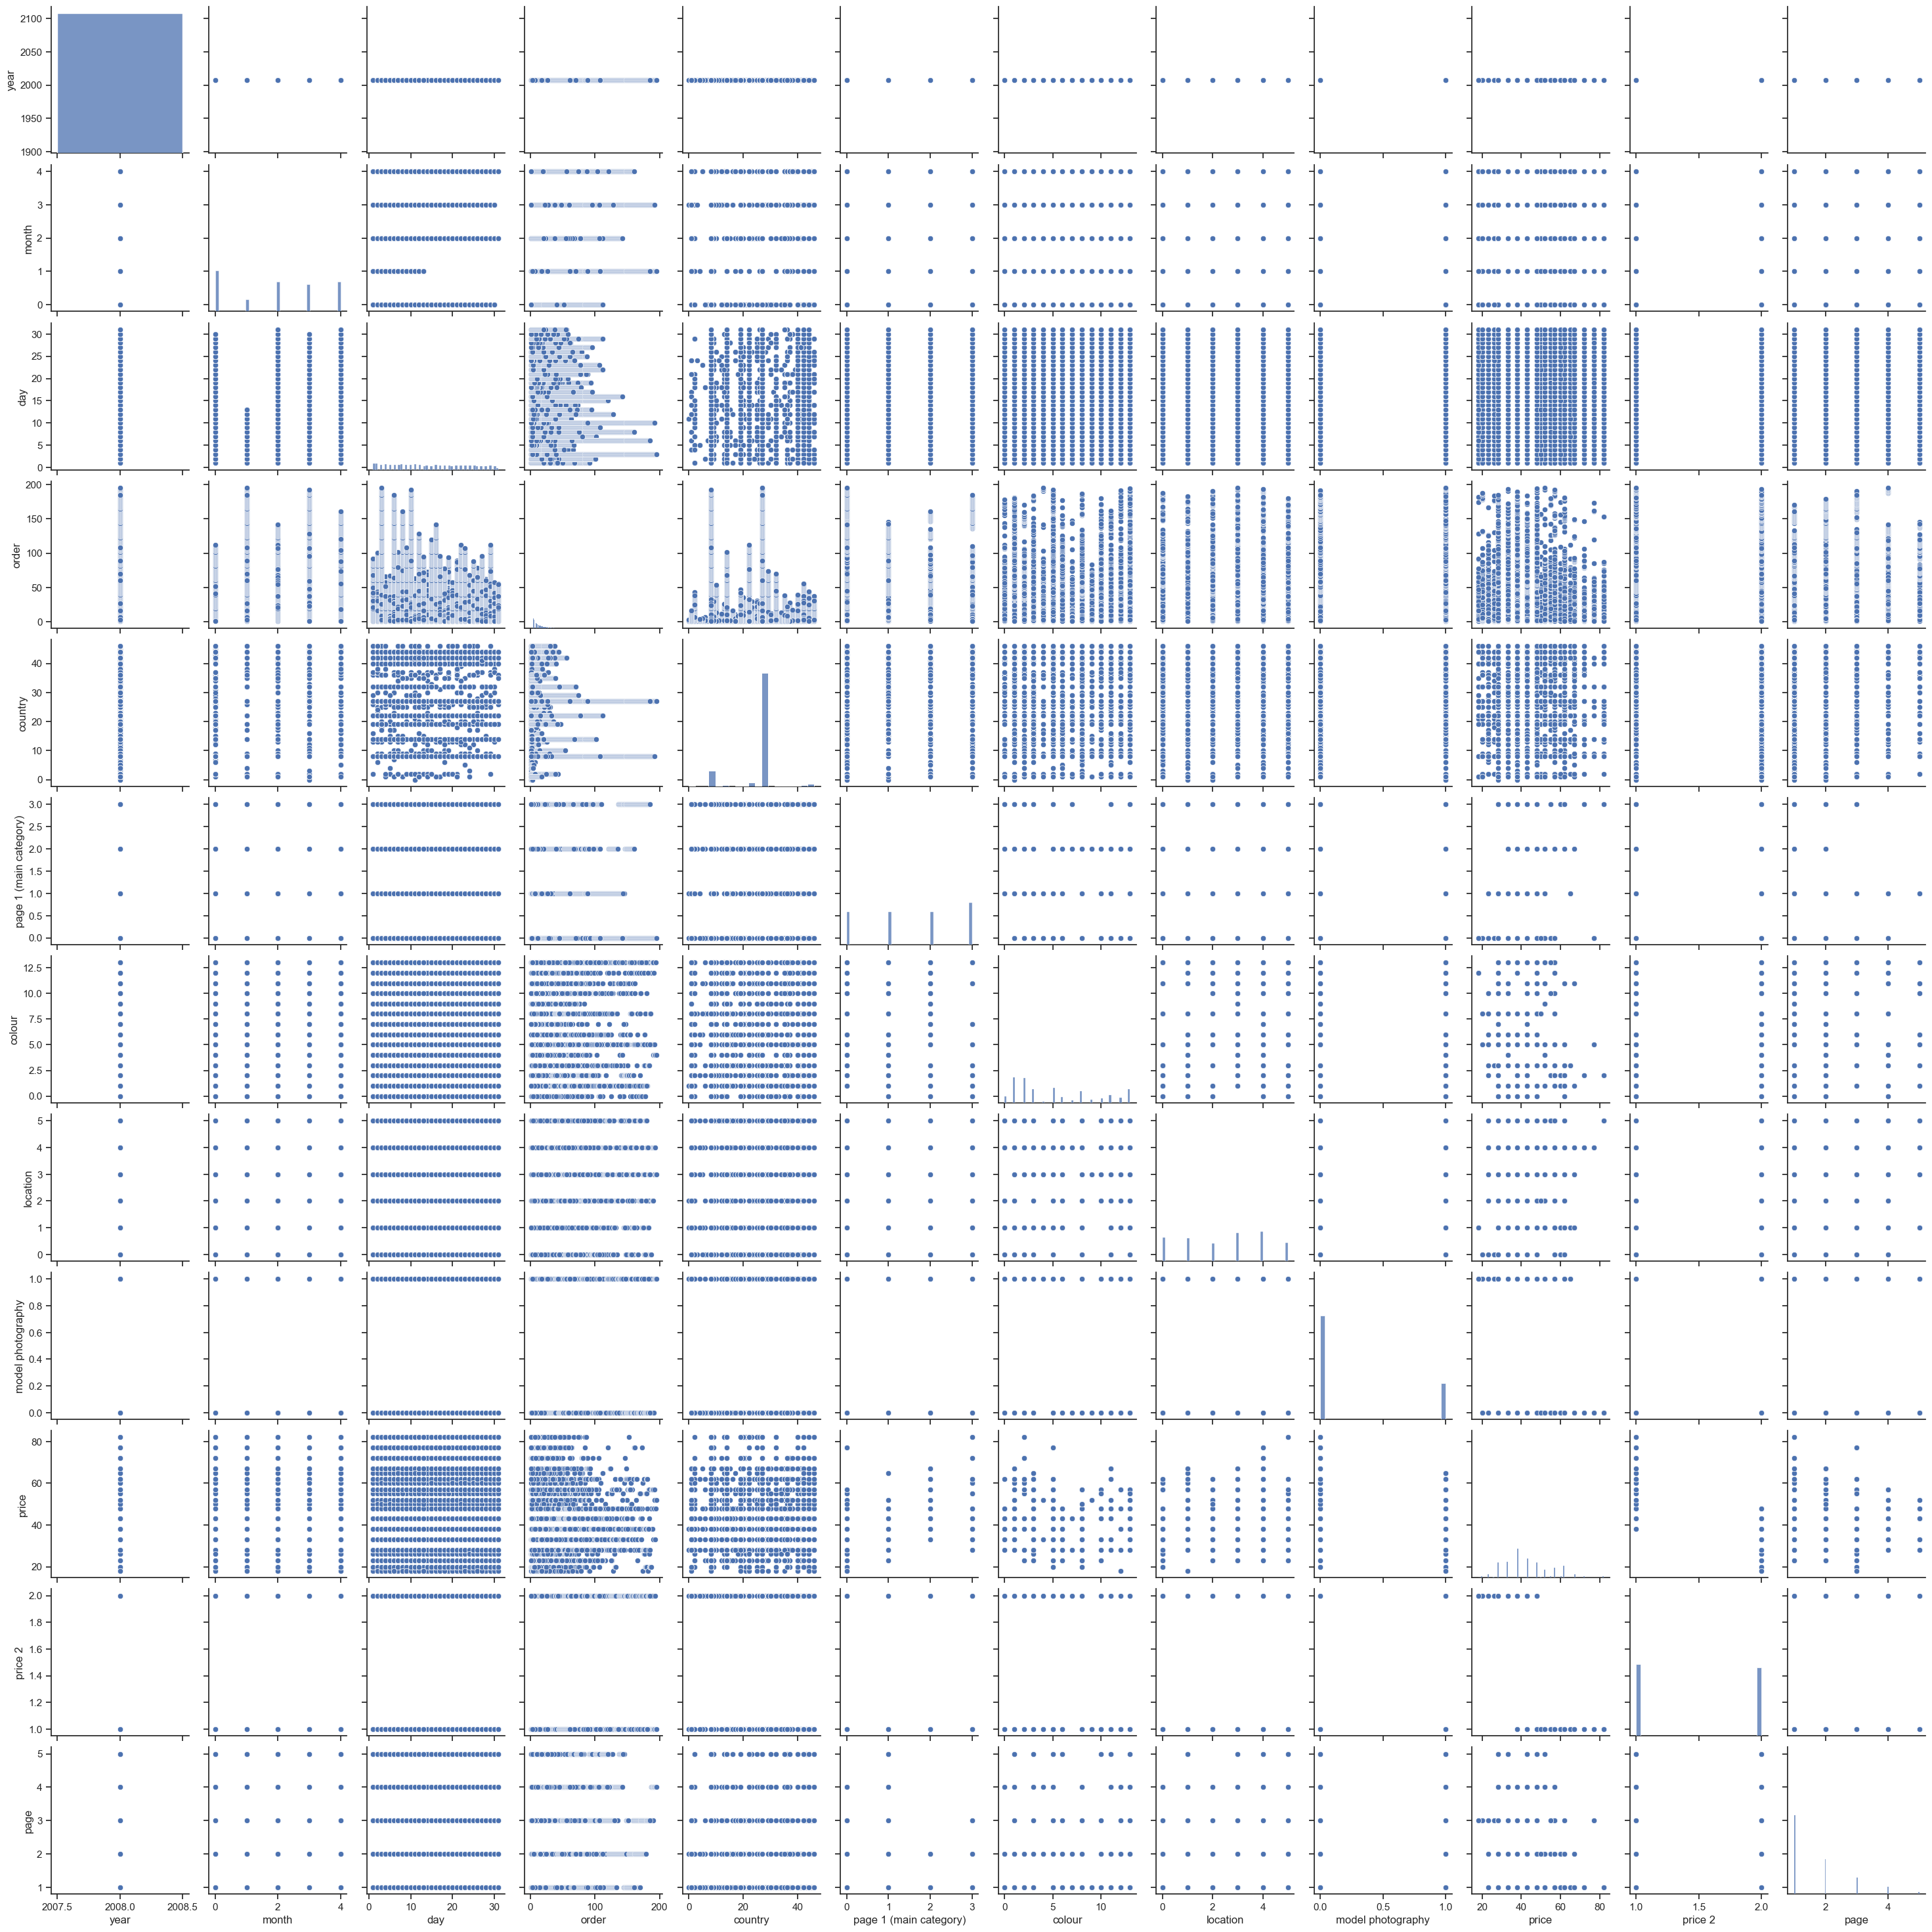

In [32]:
sns.set(style="ticks")
sns.pairplot(df)
plt.show()

In [33]:
df

,year,month,day,order,country,page 1 (main category),colour,location,model photography,price,price 2,page
0,2008,0,1,1,27,3,0,0,0,28,2,1
1,2008,0,1,2,27,3,0,2,0,33,2,1
2,2008,0,1,3,27,2,9,3,0,52,1,1
3,2008,0,1,4,27,2,5,2,1,38,2,1
4,2008,0,1,5,27,2,3,5,1,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,1,13,1,27,2,1,1,0,67,1,1
165470,2008,1,13,1,8,3,2,1,0,62,1,1
165471,2008,1,13,1,32,3,2,4,0,43,2,1
165472,2008,1,13,2,32,0,11,4,0,43,1,1


In [34]:
file_name = 'Group_1_Clean_data.npz'

# Convert your DataFrame to a NumPy array
data_array = df.to_numpy()
# Saving the cleaned data as npz and csv file

np.savez('Group_1_Clean_data.npz', data_array=data_array)
df.to_csv('Group_1_Clean_data.csv', index=False)

In [35]:
from sklearn.model_selection import train_test_split

y = df['price 2']  # Target variable
X = df.drop(['price 2', 'price','month','day','year'], axis=1)  # Features
y = (y == 2).astype(int)

# Split the data into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
X.columns

Index(['order', 'country', 'page 1 (main category)', 'colour', 'location',
       'model photography', 'page'],
      dtype='object')

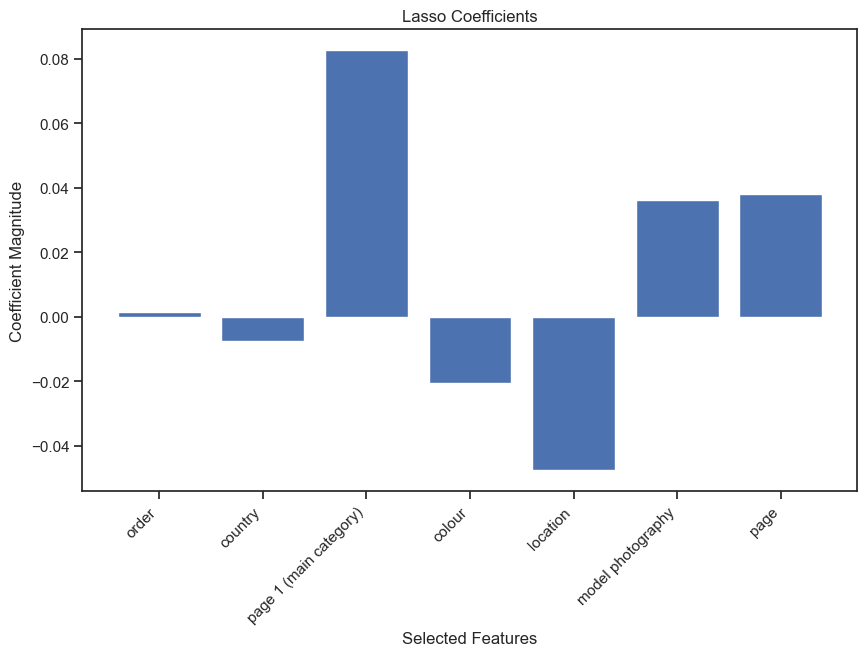

In [38]:
from sklearn.linear_model import LassoCV
# Assuming X_train and y_train are your training data
lasso_model = LassoCV(cv=5)
lasso_model.fit(X_train, y_train)

# Get the selected features based on non-zero coefficients
selected_features = X.columns[lasso_model.coef_ != 0]

# Visualize the magnitude of the coefficients
plt.figure(figsize=(10, 6))
plt.bar(X.columns, lasso_model.coef_)
plt.xlabel('Selected Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Lasso Coefficients')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


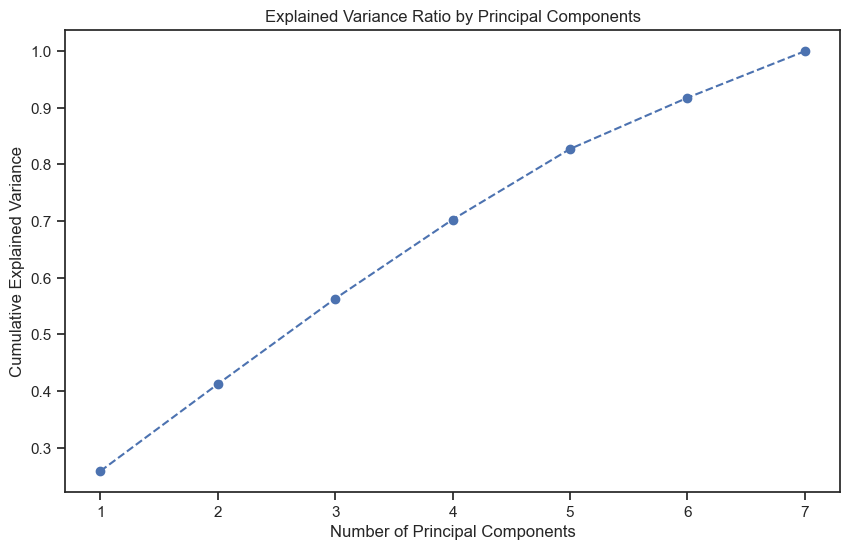

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X_train is your training data
pca = PCA()
X_pca = pca.fit_transform(X_train)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()


In [40]:
# Print the selected features
print("Selected Features:", selected_features)

# Filter selected features for both training and testing sets
X_train = X_train[:, lasso_model.coef_ != 0]
X_test = X_test[:, lasso_model.coef_ != 0]

Selected Features: Index(['order', 'country', 'page 1 (main category)', 'colour', 'location',
       'model photography', 'page'],
      dtype='object')


In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_classification_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate various metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    fpr, tpr, _ = roc_curve(y_test, y_pred if len(y_pred.shape) == 1 else y_pred[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.subplot(1, 3, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model.__class__.__name__}')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

    # Print the metrics
    print(f'Test Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print('Confusion Matrix:\n', conf_matrix)


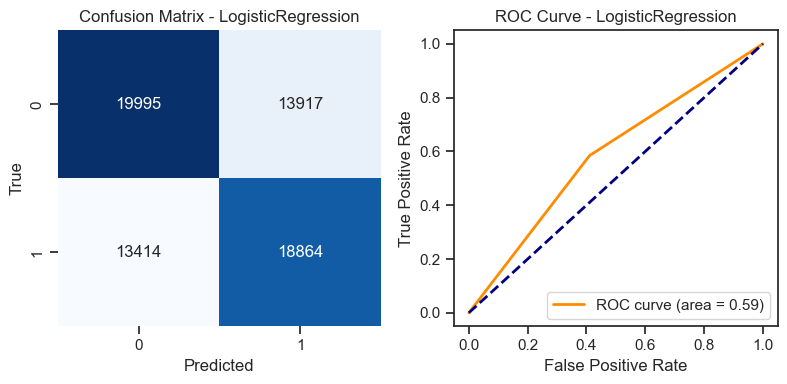

Test Accuracy: 0.5870826408823085
Precision: 0.5754552942253135
Recall: 0.5844228266931036
F1 Score: 0.5799043944727095
Confusion Matrix:
 [[19995 13917]
 [13414 18864]]
Best Hyperparameters: {'C': 1}


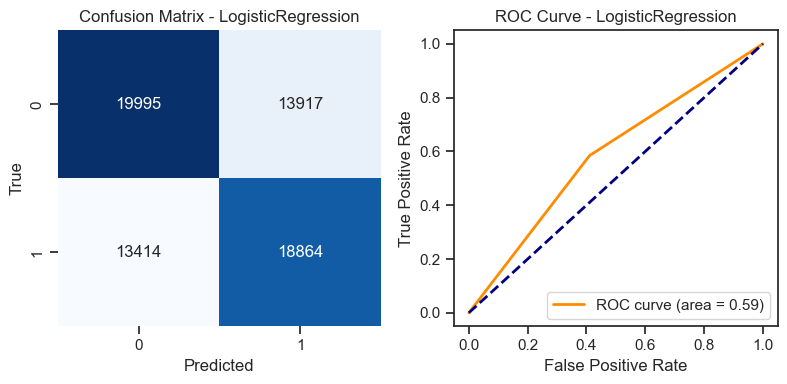

Test Accuracy: 0.5870826408823085
Precision: 0.5754552942253135
Recall: 0.5844228266931036
F1 Score: 0.5799043944727095
Confusion Matrix:
 [[19995 13917]
 [13414 18864]]


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a vanilla Logistic Regression model (no hyperparameter tuning)
vanilla_logistic_regression = LogisticRegression(random_state=42)

# Fit the vanilla model to the training data
vanilla_logistic_regression.fit(X_train, y_train)

# Use the evaluation function for the vanilla model
evaluate_classification_model(vanilla_logistic_regression, X_test, y_test)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization parameter
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model_lr = grid_search.best_estimator_

# Use the evaluation function
evaluate_classification_model(best_model_lr, X_test, y_test)


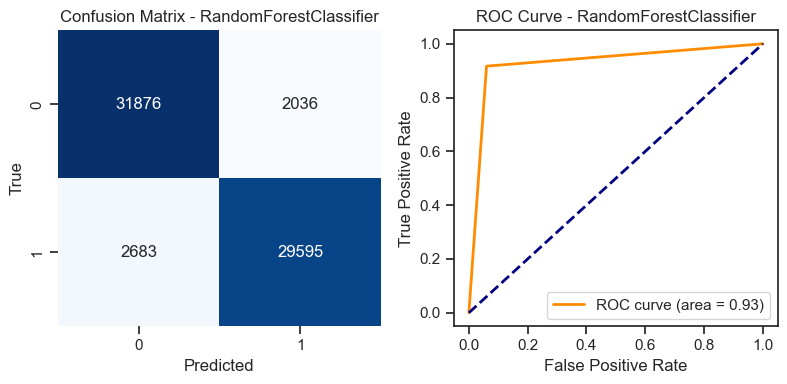

Test Accuracy: 0.9287052424837589
Precision: 0.9356327653251557
Recall: 0.9168783691678543
F1 Score: 0.9261606346523964
Confusion Matrix:
 [[31876  2036]
 [ 2683 29595]]
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}


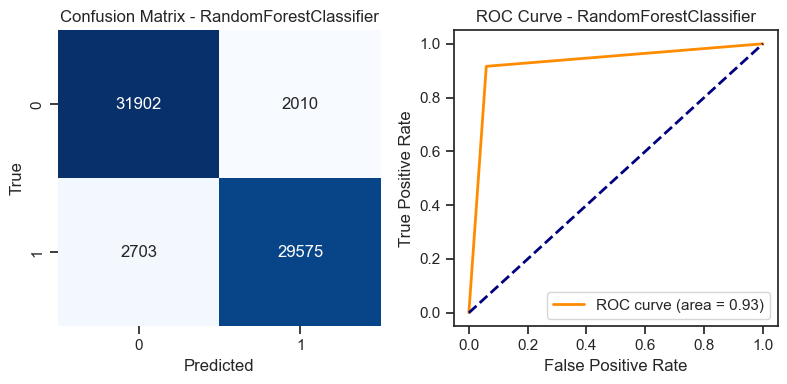

Test Accuracy: 0.9287958906179181
Precision: 0.9363621972455279
Recall: 0.9162587520912077
F1 Score: 0.9262013998716001
Confusion Matrix:
 [[31902  2010]
 [ 2703 29575]]


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

vanilla_random_forest = RandomForestClassifier(random_state=33)

# Fit the vanilla model to the training data
vanilla_random_forest.fit(X_train, y_train)

# Use the evaluation function for the vanilla model
evaluate_classification_model(vanilla_random_forest, X_test, y_test)
# Define the hyperparameter grid for GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
}

# Create the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search_rf.best_params_)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Use the evaluation function
evaluate_classification_model(best_rf_model, X_test, y_test)


c:\Users\georg\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


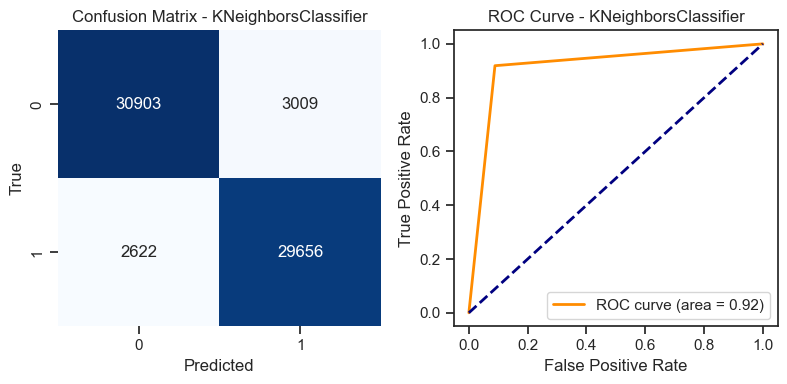

Test Accuracy: 0.9149267260915546
Precision: 0.9078830552579213
Recall: 0.9187682012516265
F1 Score: 0.9132931955715012
Confusion Matrix:
 [[30903  3009]
 [ 2622 29656]]


c:\Users\georg\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\georg\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best Hyperparameters: {'n_neighbors': 9, 'weights': 'distance'}


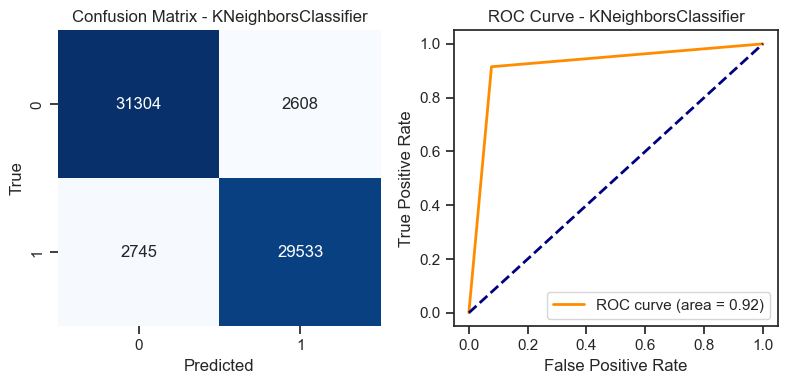

Test Accuracy: 0.9191267563075993
Precision: 0.9188575339908528
Recall: 0.9149575562302497
F1 Score: 0.9169033980657879
Confusion Matrix:
 [[31304  2608]
 [ 2745 29533]]


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

vanilla_knn = KNeighborsClassifier()
vanilla_knn.fit(X_train,y_train)
evaluate_classification_model(vanilla_knn, X_test, y_test)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
    }

# Create the KNN model
knn = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_knn.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search_knn.best_params_)

# Get the best model
best_knn_model = grid_search_knn.best_estimator_

# Use the evaluation function
evaluate_classification_model(best_knn_model, X_test, y_test)


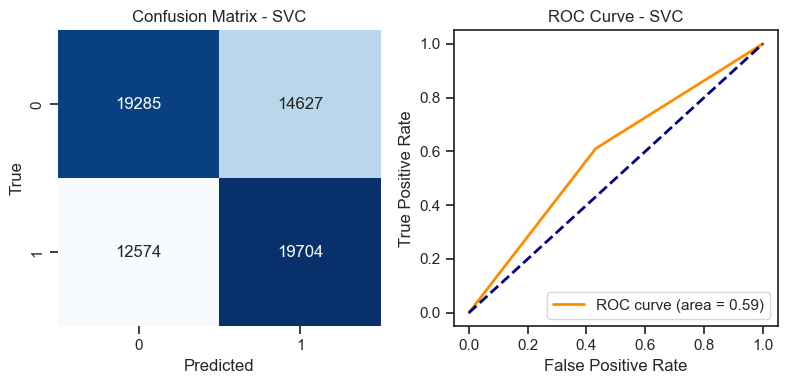

Test Accuracy: 0.589046683789092
Precision: 0.5739419183828027
Recall: 0.6104467439122622
F1 Score: 0.5916317614736748
Confusion Matrix:
 [[19285 14627]
 [12574 19704]]


In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


# Create the SVM model with a linear kernel and C=0.1
svm_model_linear = SVC(kernel='linear', C=0.1, random_state=42)

# Fit the model to the training data
svm_model_linear.fit(X_train, y_train)

# Use the evaluation function for the linear SVM model
evaluate_classification_model(svm_model_linear, X_test, y_test)

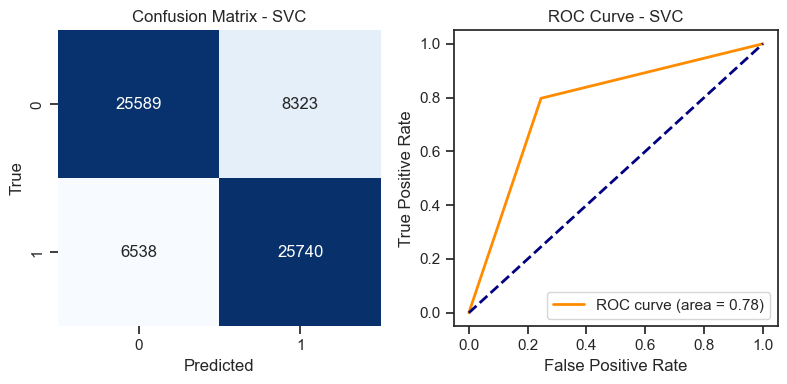

Test Accuracy: 0.7754796797099259
Precision: 0.7556586325338344
Recall: 0.7974471776442159
F1 Score: 0.7759907146410213
Confusion Matrix:
 [[25589  8323]
 [ 6538 25740]]


In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create the SVM model with an RBF (Gaussian) kernel and C=0.1
svm_model_rbf = SVC(kernel='rbf', C=0.1, random_state=42)

# Fit the model to the training data
svm_model_rbf.fit(X_train, y_train)

# Use the evaluation function for the SVM model with RBF kernel
evaluate_classification_model(svm_model_rbf, X_test, y_test)


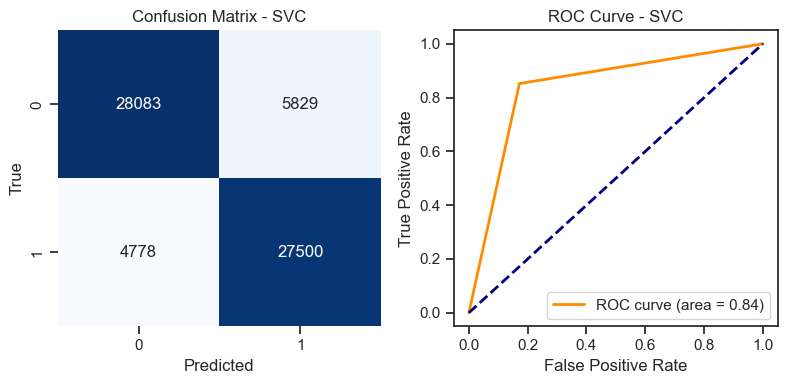

Test Accuracy: 0.8397492068288261
Precision: 0.8251072639443128
Recall: 0.8519734803891196
F1 Score: 0.8383251787156858
Confusion Matrix:
 [[28083  5829]
 [ 4778 27500]]
[15:36:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "random_forest" } are not used.

Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200}


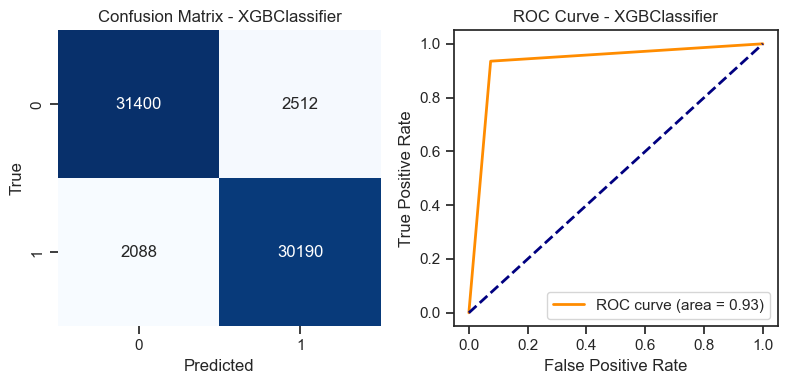

Test Accuracy: 0.9305030971445838
Precision: 0.9231851262919699
Recall: 0.9353119771980916
F1 Score: 0.9292089873807325
Confusion Matrix:
 [[31400  2512]
 [ 2088 30190]]


In [47]:
from xgboost import XGBClassifier

vanilla_linear_xgb = SVC(random_state=42)
vanilla_linear_xgb.fit(X_train,y_train)
evaluate_classification_model(vanilla_linear_xgb, X_test, y_test)

# Define a smaller hyperparameter grid for quicker training
param_grid = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
    }

# Create the XGBoost model
xgb_model = XGBClassifier(random_forest=42)

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search_xgb.best_params_)

# Get the best XGBoost model
best_xgb_model = grid_search_xgb.best_estimator_

# Use the evaluation function
evaluate_classification_model(best_xgb_model, X_test, y_test)


In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_classification_model_fornn(model, X_test, y_test):
    # Make predictions
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Calculate various metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - NN')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # ROC Curve and AUC
    fpr_nn, tpr_nn, _ = roc_curve(y_test, model.predict(X_test))
    roc_auc_nn = auc(fpr_nn, tpr_nn)
    plt.subplot(1, 3, 2)
    plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_nn))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - NN')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print the metrics
    print(f'Test Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print('Confusion Matrix:\n', conf_matrix)


Epoch 1/10
2483/2483 [==============================] - 3s 942us/step - loss: 0.5623 - accuracy: 0.7134 - val_loss: 0.4795 - val_accuracy: 0.7881
Epoch 2/10
2483/2483 [==============================] - 2s 923us/step - loss: 0.4410 - accuracy: 0.8005 - val_loss: 0.4026 - val_accuracy: 0.8059
Epoch 3/10
2483/2483 [==============================] - 2s 898us/step - loss: 0.3774 - accuracy: 0.8311 - val_loss: 0.3438 - val_accuracy: 0.8458
Epoch 4/10
2483/2483 [==============================] - 2s 898us/step - loss: 0.3235 - accuracy: 0.8518 - val_loss: 0.2938 - val_accuracy: 0.8588
Epoch 5/10
2483/2483 [==============================] - 2s 841us/step - loss: 0.2794 - accuracy: 0.8708 - val_loss: 0.2526 - val_accuracy: 0.8853
Epoch 6/10
2483/2483 [==============================] - 2s 924us/step - loss: 0.2472 - accuracy: 0.8856 - val_loss: 0.2235 - val_accuracy: 0.8858
Epoch 7/10
2483/2483 [==============================] - 2s 943us/step - loss: 0.2239 - accuracy: 0.8942 - val_loss: 0.2022 -

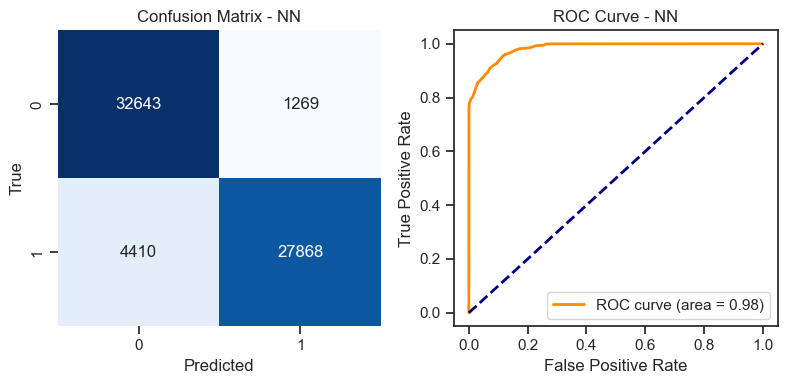

Test Accuracy: 0.9142015410182807
Precision: 0.9564471290798641
Recall: 0.8633744345994175
F1 Score: 0.9075307335341529
Confusion Matrix:
 [[32643  1269]
 [ 4410 27868]]


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
nnmodel = Sequential()

# Add the first hidden layer with 32 neurons and input shape of 10 (assuming 10 features)
nnmodel.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))

# Add the second hidden layer with 16 neurons
nnmodel.add(Dense(16, activation='relu'))

# Add the output layer with 1 neuron (binary classification) and sigmoid activation
nnmodel.add(Dense(1, activation='sigmoid'))

# Compile the model
nnmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nnmodel.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
evaluate_classification_model_fornn(nnmodel, X_test, y_test)

Epoch 1/20
2483/2483 [==============================] - 6s 2ms/step - loss: 0.6465 - accuracy: 0.6399 - val_loss: 0.5108 - val_accuracy: 0.7594
Epoch 2/20
2483/2483 [==============================] - 5s 2ms/step - loss: 0.5135 - accuracy: 0.7395 - val_loss: 0.3653 - val_accuracy: 0.8071
Epoch 3/20
2483/2483 [==============================] - 5s 2ms/step - loss: 0.4336 - accuracy: 0.7867 - val_loss: 0.3010 - val_accuracy: 0.8677
Epoch 4/20
2483/2483 [==============================] - 5s 2ms/step - loss: 0.3847 - accuracy: 0.8109 - val_loss: 0.2586 - val_accuracy: 0.8790
Epoch 5/20
2483/2483 [==============================] - 5s 2ms/step - loss: 0.3547 - accuracy: 0.8271 - val_loss: 0.2305 - val_accuracy: 0.8968
Epoch 6/20
2483/2483 [==============================] - 5s 2ms/step - loss: 0.3320 - accuracy: 0.8384 - val_loss: 0.2123 - val_accuracy: 0.9024
Epoch 7/20
2483/2483 [==============================] - 5s 2ms/step - loss: 0.3189 - accuracy: 0.8442 - val_loss: 0.1959 - val_accuracy:

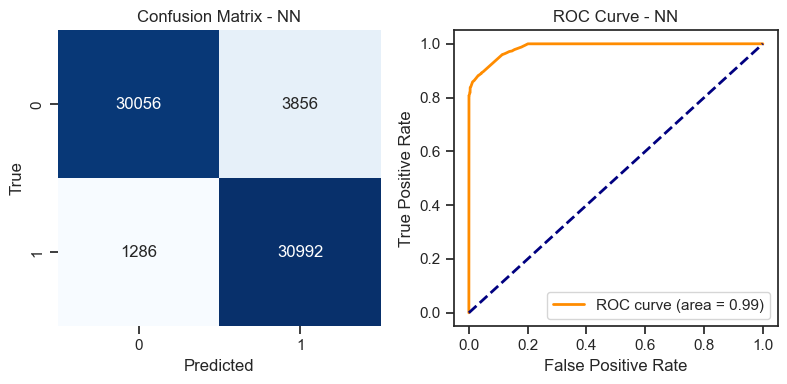

Test Accuracy: 0.9223145490255326
Precision: 0.889348025711662
Recall: 0.9601586219716215
F1 Score: 0.9233977892321902
Confusion Matrix:
 [[30056  3856]
 [ 1286 30992]]


In [50]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Build a more complex neural network model
best_ann_model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(1, activation='sigmoid')  # Binary classification, so using 'sigmoid' activation
])

# Compile the model
best_ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
best_ann_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

evaluate_classification_model_fornn(best_ann_model, X_test, y_test)


2069/2069 [==============================] - 1s 704us/step


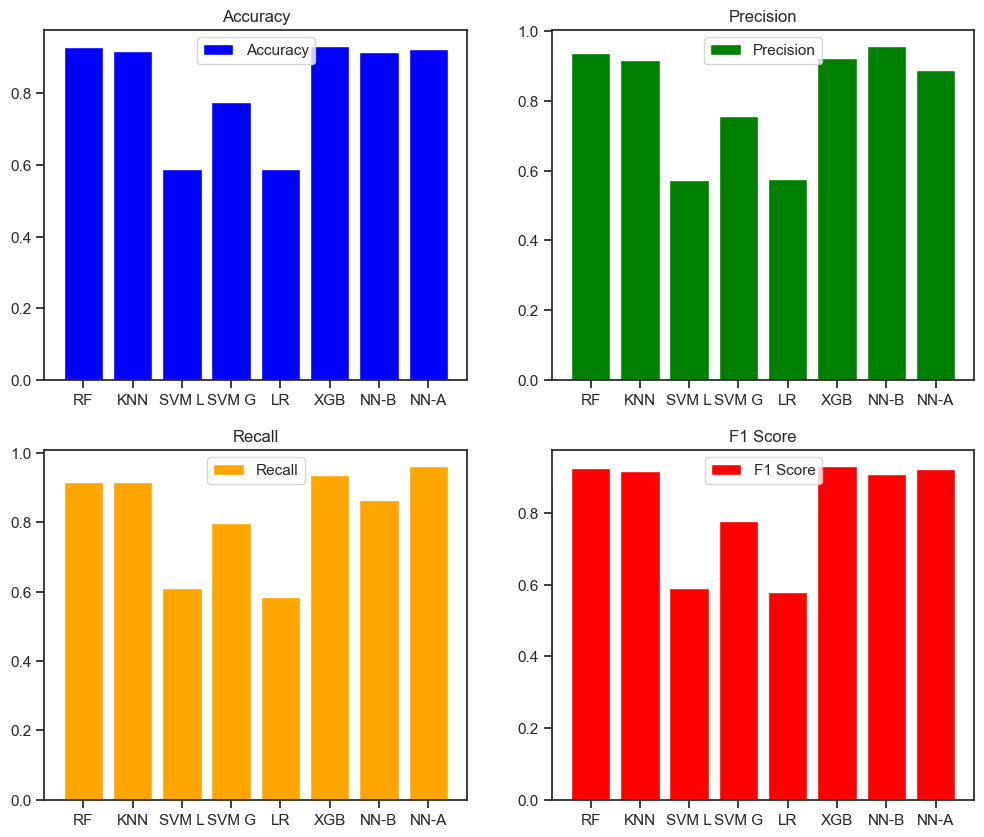

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the best models for each algorithm
best_models = [best_rf_model, best_knn_model, svm_model_linear,svm_model_rbf, best_model_lr, best_xgb_model,nnmodel,best_ann_model]

# Initialize lists to store metric values
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Iterate through the models
for model in best_models:
    # Make predictions on the testing set
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    
    # Calculate metrics
    accuracy_list.append(accuracy_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))


# Define colors for each metric
colors = ['blue', 'green', 'orange', 'red']

# Create subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Accuracy subplot
axs[0, 0].bar(range(len(best_models)), accuracy_list, color=colors[0], label='Accuracy',tick_label=['RF', 'KNN', 'SVM L', 'SVM G', 'LR', 'XGB', 'NN-B', 'NN-A'])
axs[0, 0].set_title('Accuracy')
axs[0, 0].legend()

# Precision subplot
axs[0, 1].bar(range(len(best_models)), precision_list, color=colors[1], label='Precision',tick_label=['RF', 'KNN', 'SVM L', 'SVM G', 'LR', 'XGB', 'NN-B', 'NN-A'])
axs[0, 1].set_title('Precision')
axs[0, 1].legend()

# Recall subplot
axs[1, 0].bar(range(len(best_models)), recall_list, color=colors[2], label='Recall',tick_label=['RF', 'KNN', 'SVM L', 'SVM G', 'LR', 'XGB', 'NN-B', 'NN-A'])
axs[1, 0].set_title('Recall')
axs[1, 0].legend()

# F1 Score subplot
axs[1, 1].bar(range(len(best_models)), f1_list, color=colors[3], label='F1 Score',tick_label=['RF', 'KNN', 'SVM L', 'SVM G', 'LR', 'XGB', 'NN-B', 'NN-A'])
axs[1, 1].set_title('F1 Score')
axs[1, 1].legend()

plt.show()


In [52]:
models_with_accuracy = list(zip(best_models, accuracy_list))
sorted_models = sorted(models_with_accuracy, key=lambda x: x[1], reverse=True)
sorted_models, sorted_accuracies = zip(*sorted_models)

# Display the sorted models
print("Sorted Models based on Accuracy:")
for model, accuracy in zip(sorted_models, sorted_accuracies):
    print(f"{model.__class__.__name__}: {accuracy:.4f}")

Sorted Models based on Accuracy:
XGBClassifier: 0.9305
RandomForestClassifier: 0.9288
Sequential: 0.9223
KNeighborsClassifier: 0.9191
Sequential: 0.9142
SVC: 0.7755
SVC: 0.5890
LogisticRegression: 0.5871


In [59]:
top_model = sorted_models[0]

# Exclude models with the name "Sequential" from top_3_models
top_3_models = [model for model in sorted_models[:5] if model.__class__.__name__ != "Sequential"]

# Display the top model and top 3 models
print("Top Model based on Accuracy:")
print(f"{top_model.__class__.__name__}: {sorted_accuracies[0]:.4f}")

print("\nTop 3 Models based on Accuracy:")
for model, accuracy in zip(top_3_models, sorted_accuracies[:5]):
    print(f"{model.__class__.__name__}: {accuracy:.4f}")


Top Model based on Accuracy:
XGBClassifier: 0.9305

Top 3 Models based on Accuracy:
XGBClassifier: 0.9305
RandomForestClassifier: 0.9288
KNeighborsClassifier: 0.9223


In [54]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Convert X_train and X_test back to DataFrames
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Define XGBoost model with best hyperparameters
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=200)

# Fit the XGBoost model on the training data
xgb_model.fit(X_train_df, y_train)

# Make predictions on the testing data
y_pred = xgb_model.predict(X_test_df)
initial_accuracy = accuracy_score(y_test, y_pred)
print(f'Initial Accuracy: {initial_accuracy}')

# Perform Bidirectional Elimination
included_features = list(X.columns)

while True:
    changed = False

    # Forward step
    for feature in X.columns:
        if feature not in included_features:
            xgb_model.fit(X_train_df[included_features + [feature]], y_train)
            y_pred = xgb_model.predict(X_test_df[included_features + [feature]])
            accuracy_with_feature = accuracy_score(y_test, y_pred)

            if accuracy_with_feature > initial_accuracy:
                included_features.append(feature)
                initial_accuracy = accuracy_with_feature
                changed = True

    # Backward step
    for feature in included_features:
        current_features = [f for f in included_features if f != feature]
        xgb_model.fit(X_train_df[current_features], y_train)
        y_pred = xgb_model.predict(X_test_df[current_features])
        accuracy_without_feature = accuracy_score(y_test, y_pred)

        if accuracy_without_feature > initial_accuracy:
            included_features.remove(feature)
            initial_accuracy = accuracy_without_feature
            changed = True

    if not changed:
        break

# The final set of features after Bidirectional Elimination
final_features = included_features
print('Final Features:', final_features)

# Use the selected features for further analysis or modeling
X_final_selected = X[final_features]

# Train the final XGBoost model with selected features
xgb_model_final = XGBClassifier(learning_rate=0.1, n_estimators=200)
xgb_model_final.fit(X_train_df[final_features], y_train)

# Make predictions on the testing data with the final model
y_pred_final = xgb_model_final.predict(X_test_df[final_features])
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f'Final Accuracy: {final_accuracy}')


Initial Accuracy: 0.9305030971445838
Final Features: ['order', 'country', 'page 1 (main category)', 'colour', 'location', 'model photography', 'page']
Final Accuracy: 0.9305030971445838


[15:52:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "random_forest" } are not used.



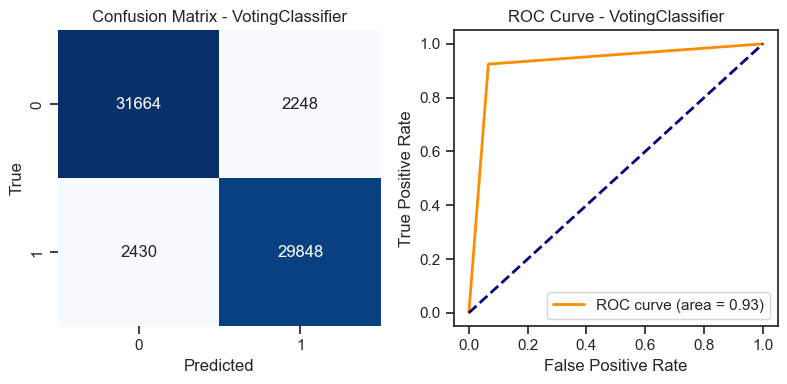

Test Accuracy: 0.9293246714005137
Precision: 0.9299601196410767
Recall: 0.9247165251874342
F1 Score: 0.9273309099947182
Confusion Matrix:
 [[31664  2248]
 [ 2430 29848]]


In [60]:
from sklearn.ensemble import VotingClassifier

# Assuming you have the top 3 models stored in top_3_models
model_names = [model.__class__.__name__ for model in top_3_models]

# Create a VotingClassifier with 'hard' voting (majority class)
ensemble_model = VotingClassifier(estimators=list(zip(model_names, top_3_models)), voting='hard')

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model
evaluate_classification_model(ensemble_model, X_test, y_test)


XGBoost is a powerful gradient boosting algorithm designed for speed and performance. It is widely used for regression and classification tasks. It leverages decision trees as base learners and employs an additive gausian training strategy. https://xgboost.readthedocs.io/en/stable/

The Basic Deep Learning Model consists of a simpler architecture with two hidden layers. The first layer has 32 neurons with a ReLU activation function, and the second layer comprises 16 neurons also using ReLU activation. The output layer has a single neuron with sigmoid activation, suitable for binary classification. The model is compiled with the Adam optimizer and binary cross-entropy loss for training, measuring accuracy as the evaluation metric.

For the Extreme Machine Learning Model, the architecture involves three hidden layers with 256, 128, and 64 neurons, respectively, using ReLU activation functions. Batch normalization and dropout layers are incorporated to enhance training robustness and prevent overfitting. The model concludes with a single neuron output layer using the sigmoid activation function for binary classification.

An ensemble model containing XGBoost, Random Forest (RF), and k-Nearest Neighbors (KNN) combines the strengths of these diverse algorithms to improve overall predictive performance. XGBoost excels in boosting, RF in bagging, and KNN in instance-based learning, creating a robust and versatile predictive model (sources: https://xgboost.readthedocs.io/en/stable/, https://www.ibm.com/topics/random-forest#:~:text=Random%20forest%20is%20a%20commonly,both%20classification%20and%20regression%20problems., https://www.ibm.com/topics/knn#:~:text=Next%20steps-,K%2DNearest%20Neighbors%20Algorithm,of%20an%20individual%20data%20point.)